# **Predicting Likes Quantity For Data Sets In Kaggle**
**By(Shaikha Bin Ateeq)**

# **Overview:**

Kaggle is a data science and machine learning online community. Users can use Kaggle to acquire and publish data sets, explore and build models in a web-based data-science environment, collaborate with other data scientists and machine learning experts, and compete in data science challenges.[1] However the number of likes on the dataset may be considered a significant point, as the selection of the dataset may depend on it, to develop a solution that aims to predict the number of likes on data set based on a machine learning algorithm; specifically, we will be using a linear regression model. To do so, we will use a scraped date from the Kaggle dataset in ‘computer since’ .

# **Data Overview:**

The data set for the model will be scraped from Kaggle website: https://www.kaggle.com/. The below table outlines the features that will be used to develop the prediction model. 
Dataset Name: The name of the dataset 

*   Created By: the person how  published the dataset
*   Rank: There are three levels of award, Bronze, Silver and Gold 
* Like: number of like in the dataset
*  Download Size: download size of the dataset
*  Notebook: number of Jupyter notebooks of the dataset
* View:The number of people who had viewed the data




**Import Library:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
%matplotlib inline

**Import Data:**

In [2]:
df = pd.read_csv('/content/data1.csv')

**Explore The Data**

In [3]:
df.head()

,Unnamed: 0,DataSet Name,Created By,Rank,Like,Download Size,Notebook,View
0,0,2018 Kaggle Machine Learning & Data Science Su...,Not Definde,Gold,987,42.56 MB,472,"388,207 views"
1,1,Keras Pretrained models,beluga,Gold,400,1.07 GB,547,"61,726 views"
2,2,IPL _Data_Set,Ramji,Gold,250,18.43 MB,1,"63,513 views"
3,3,2017 Kaggle Machine Learning & Data Science Su...,Not Definde,Gold,838,29.23 MB,427,"203,837 views"
4,4,NIH Chest X-rays,Not Definde,Gold,861,45.08 GB,1,"371,760 views"


In [4]:
df.shape

(200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     200 non-null    int64 
 1   DataSet Name   200 non-null    object
 2   Created By     200 non-null    object
 3   Rank           190 non-null    object
 4   Like           200 non-null    int64 
 5   Download Size  200 non-null    object
 6   Notebook       200 non-null    int64 
 7   View           200 non-null    object
dtypes: int64(3), object(5)
memory usage: 12.6+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

Rank             10
View              0
Notebook          0
Download Size     0
Like              0
Created By        0
DataSet Name      0
Unnamed: 0        0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Like,Notebook
count,200.000000,200.000000,200.000000
mean,99.500000,158.620000,43.025000
std,57.879185,188.017148,100.465471
min,0.000000,9.000000,1.000000
25%,49.750000,41.750000,3.000000
50%,99.500000,90.500000,8.000000
75%,149.250000,201.000000,34.250000
max,199.000000,1270.000000,700.000000


# **Data Cleanning :**

In [8]:
df["Rank"].mode()

0     Bronze
dtype: object

In [9]:
df["Rank"] = df["Rank"].fillna(' Bronze') # since the 'Rank' have null value we fillna withe mode 

In [10]:
df["Rank"].unique()

array([' Gold', ' Silver', ' Bronze'], dtype=object)

In [11]:
df.isnull().sum().sort_values(ascending=False)

View             0
Notebook         0
Download Size    0
Like             0
Rank             0
Created By       0
DataSet Name     0
Unnamed: 0       0
dtype: int64

In [12]:
#insted of catogrical value we convert it as numriec 
x=[] 
for i in range(0,200):
  if df.Rank[i]==' Gold':
    x.append(100)
  elif df.Rank[i]==' Silver':
    x.append(66.67)
  elif df.Rank[i]==' Bronze':
    x.append(33.33)
  else:
    print('error')

df['Rank_Ratio']=x

In [13]:
df['View']= df['View'].str.replace("views", "")# since the 'views' have string in it's value we we replace it the convert it as float 
df['View']= df['View'].str.replace(",", "")
df['View']=df['View'].astype(int)

In [14]:
df = df.drop(['Unnamed: 0'],axis=1)# Drop the  Drop the unneeded  coulmns 

In [15]:
print('The Dimensions before dropping duplicated rows: ' + str(df.shape)) # check from duplicated rows
df = df.drop(df[df.duplicated()].index)
print('The Dimensions after dropping duplicated rows: ' + str(df.shape))

The Dimensions before dropping duplicated rows: (200, 8)
The Dimensions after dropping duplicated rows: (200, 8)


In [16]:
df = df[~(df['Like']>600)].reset_index(drop=True) 

In [17]:
df.head()

,DataSet Name,Created By,Rank,Like,Download Size,Notebook,View,Rank_Ratio
0,Keras Pretrained models,beluga,Gold,400,1.07 GB,547,61726,100.00
1,IPL _Data_Set,Ramji,Gold,250,18.43 MB,1,63513,100.00
2,Real Estate DataSet,Arslan Ali,Silver,212,35.47 kB,1,103264,66.67
3,Zoo Animal Classification,Not Definde,Silver,311,5.33 kB,3,180151,66.67
4,Glass Classification,Not Definde,Gold,258,10.05 kB,407,150836,100.00


# **Exploratory Data Analysis (EDA)**

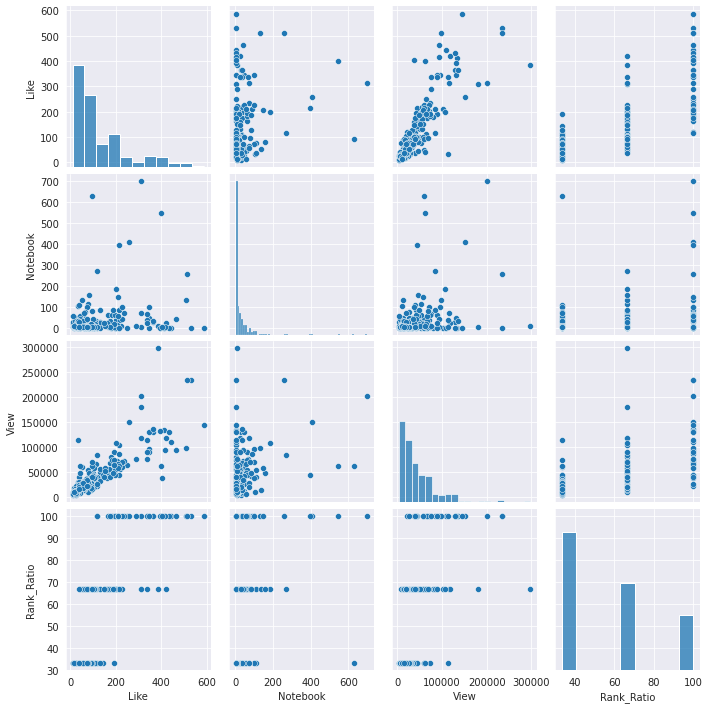

In [18]:
sns.pairplot(df )

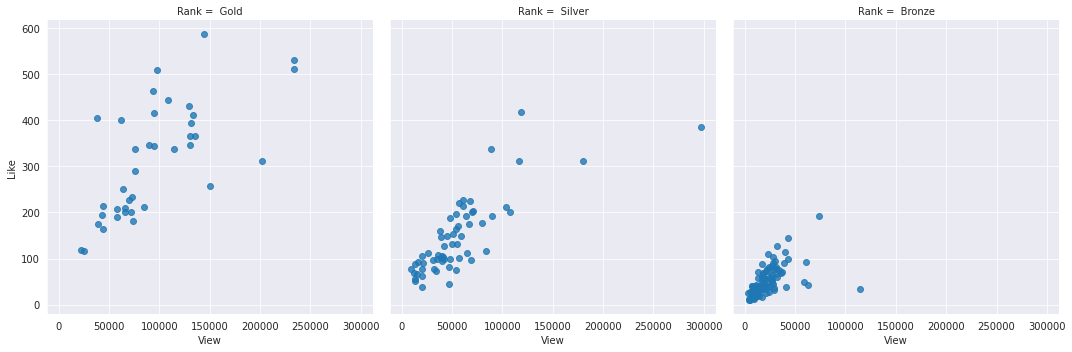

In [19]:
# plot with matplotlib
sns.lmplot(x="View", y="Like", col="Rank", fit_reg=False,
           ci=None, data=df, height=5)

We note a pattern - a correlation - between x and y that can be used to build a linear model. As View increases, Like tends to increase by a fixed amnount in Gold and Silver Rank

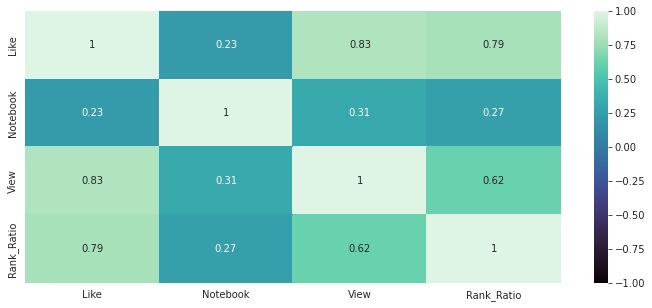

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), cmap="mako", annot=True, vmin=-1, vmax=1);

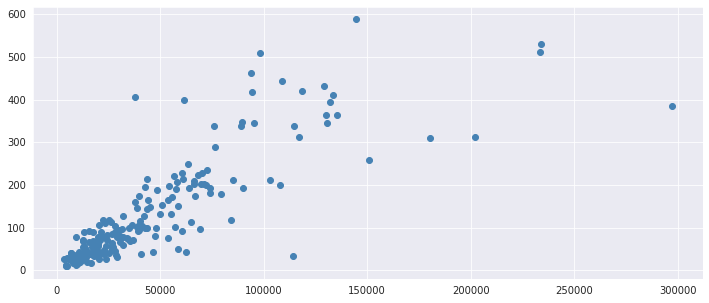

In [21]:
plt.figure(figsize=(12,5))
plt.scatter(data = df,x="View", y="Like", color='steelblue')

There is a very strong correlations between the number of likes and the number of people who  viewed the data

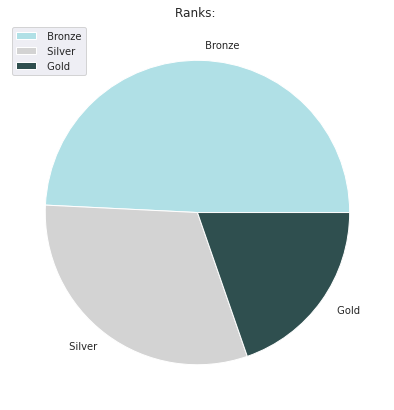

In [22]:
x=pd.DataFrame(df['Rank'].value_counts())
colors = ['powderblue','lightgray','darkslategray']

x.plot(kind='pie', subplots=True, figsize=(7, 7) ,colors=colors)
plt.title('Ranks: ')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

We can see from the pi-chart above, that bronze takes half of the data rank

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


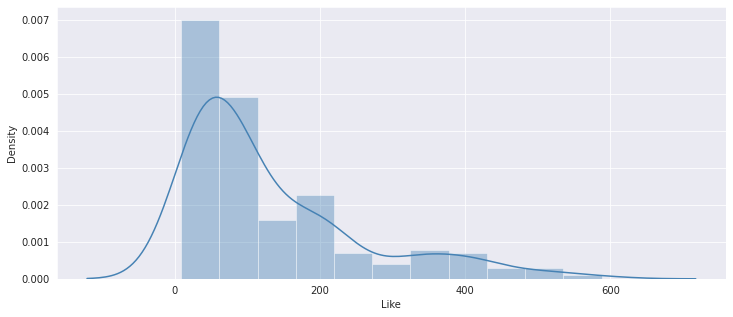

In [23]:
plt.figure(figsize=(12,5))
sns.distplot(df['Like'],color='steelblue')

The number of likes often ranges from zero to one hundred

# **Training a Linear Regression Model**

In [24]:
X = df[['Notebook','View','Rank_Ratio']]
y = df['Like']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Notebook,-0.102098
View,0.001710
Rank_Ratio,2.380261


In [28]:
predictions = lm.predict(X_test)

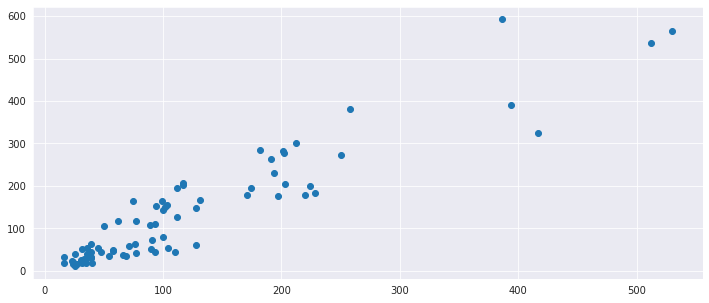

In [29]:
plt.figure(figsize=(12,5))
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 864x360 with 0 Axes>

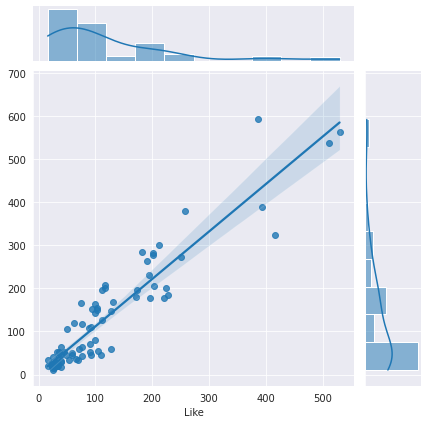

In [37]:
plt.figure(figsize=(12,5))
sns.jointplot(y_test,predictions ,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


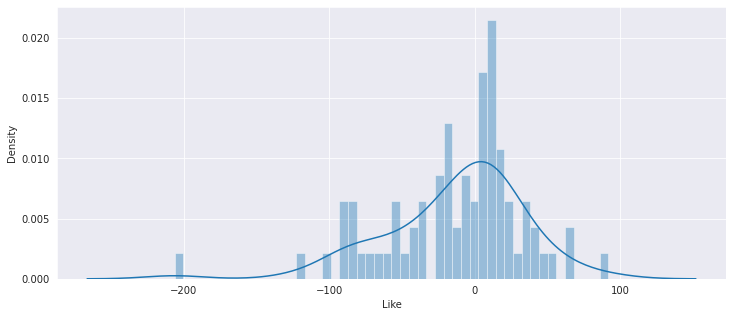

In [30]:
plt.figure(figsize=(12,5))
sns.distplot((y_test-predictions),bins=50);

In [31]:
lm.score(X,y)

0.802309760111573

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 35.175106770112826
MSE: 2439.5087432917603
RMSE: 49.391383289919716
